## Satistics : Probability Distribution

https://numpy.org/doc/stable/reference/random/legacy.html

### 1. Normal Distribution

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import math as math
sns.set()

$f(x,\mu,\sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}} e ^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$

In [2]:
def normal(x,m,s):
    f = (1/np.sqrt(2*np.pi*s))*np.exp(-(x-m)**2/(2*s**2))
    return f

In [3]:
x = np.arange(-20,20,0.01)

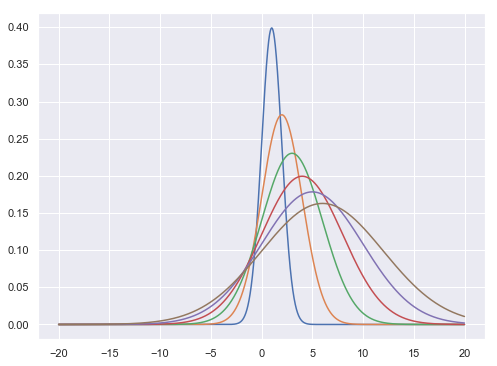

In [4]:
plt.figure(figsize = [8,6])
plt.plot(x,normal(x,1.0,1.0),x,normal(x,2.0,2.0),\
        x,normal(x,3.0,3.0),x,normal(x,4.0,4.0),\
        x,normal(x,5.0,5.0),x,normal(x,6.0,6.0))
plt.show()

#### Sampling Normal distribution

In [17]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [18]:
s[0:10]

array([-0.00682791, -0.08991848,  0.24455438,  0.14724173, -0.01939023,
        0.07666377, -0.00425391, -0.04374468, -0.03458053, -0.08640109])

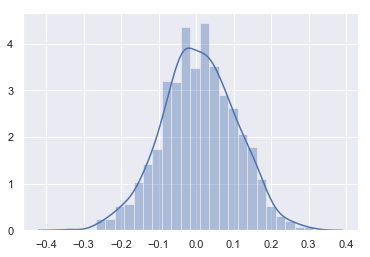

In [19]:
sns.distplot(s)

- Lets check this with uniform distribution

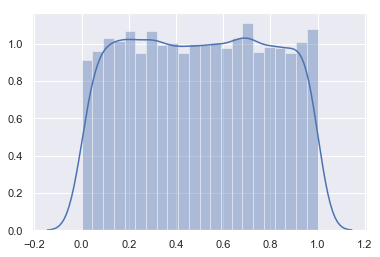

In [20]:
s0 = np.random.rand(10000)
sns.distplot(s0)

### 2. Binomial Distribution

The probability density for the binomial distribution is

$P(N) = \binom{n}{N}p^N(1-p)^{n-N}$,

where n is the number of trials, p is the probability of success, and N is the number of successes.

When estimating the standard error of a proportion in a population by using a random sample, the normal distribution works well unless the product p*n <=5, where p = population proportion estimate, and n = number of samples, in which case the binomial distribution is used instead. For example, a sample of 15 people shows 4 who are left handed, and 11 who are right handed. Then p = 4/15 = 27%. 0.27*15 = 4, so the binomial distribution should be used in this case.

**Tossing n coins | throwing 10 balls in 2 compartments**

In [25]:
# number of coins in one experiment
n = 10


# probability for head
p = .5 

#number of experiment
N = 1000 
s = np.random.binomial(n, p, 1000)

In [26]:
s[0:10]

array([5, 4, 5, 6, 3, 3, 5, 3, 2, 6])

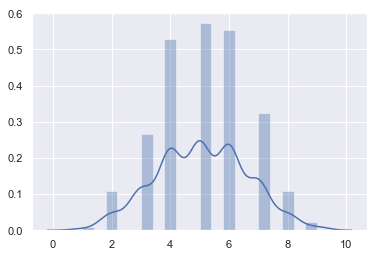

In [27]:
sns.distplot(s)

- Taking 100  coins

In [28]:
n, p = 100, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 100000)

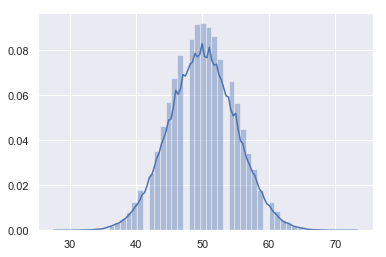

In [30]:
sns.distplot(s)

### 3. Multinomial Distribution

The multinomial distribution is a multivariate generalization of the binomial distribution. Take an experiment with one of p possible outcomes. An example of such an experiment is throwing a dice, where the outcome can be 1 through 6. Each sample drawn from the distribution represents n such experiments. Its values, ```X_i = [X_0, X_1, ..., X_p]```, represent the number of times the outcome was i.

**Tossing n-number of p-side dice**

In [31]:
# number of dice in one experiment
n = 20

# number of face
p = 6

#number of experiment
N = 100

s = np.random.multinomial(n, [1/float(p)]*6, 1000)

In [34]:
s[0:5]

array([[4, 4, 3, 3, 1, 5],
       [4, 4, 2, 4, 5, 1],
       [2, 5, 2, 3, 3, 5],
       [6, 5, 3, 1, 3, 2],
       [4, 4, 3, 2, 3, 4]])

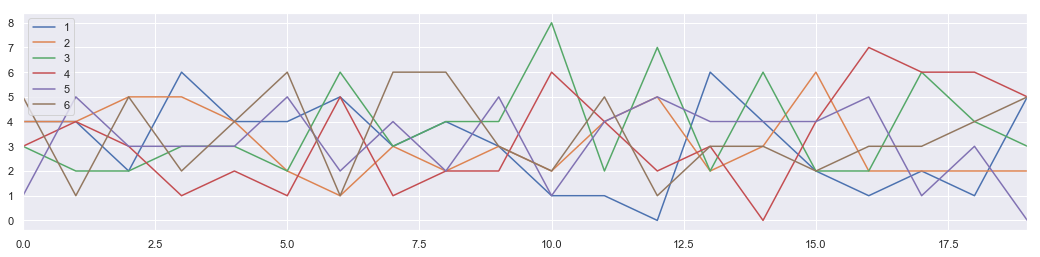

In [32]:
data = []
for item in s:
    data.append({"1":item[0],"2":item[1],"3":item[2],"4":item[3],"5":item[4],"6":item[5]})
DF = pd.DataFrame(data)
DF[0:20].plot(figsize = [18,4])

<function matplotlib.pyplot.show(*args, **kw)>

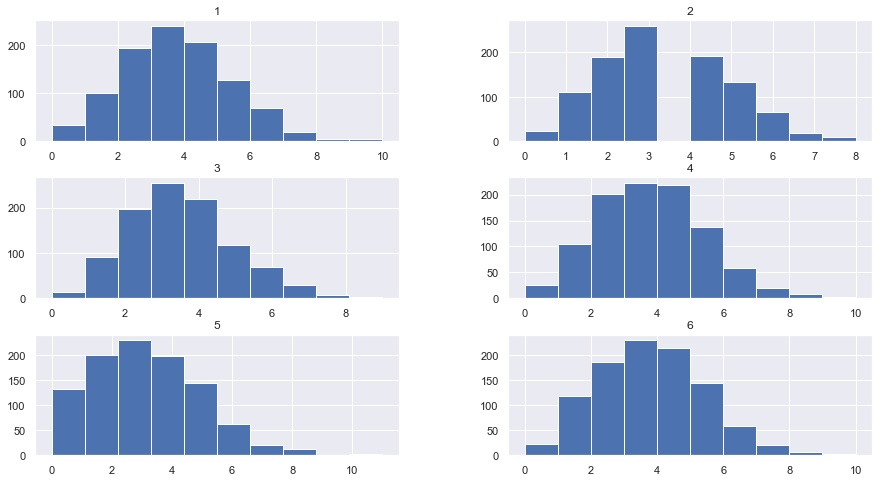

In [17]:
DF.hist(figsize = [15,8], bins = 10)
plt.show

### 4.  $\chi^{2} $ Distribution

When df independent random variables, each with standard normal distributions (mean 0, variance 1), are squared and summed, the resulting distribution is chi-square (see Notes). This distribution is often used in hypothesis testing.

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Chi-square_pdf.svg/482px-Chi-square_pdf.svg.png)

In [36]:
s = np.random.chisquare(2,10)
s

array([1.26510584, 0.84928556, 2.36818992, 0.54182822, 0.16216812,
       0.45026504, 0.31461063, 0.14277381, 3.8927845 , 2.3985151 ])

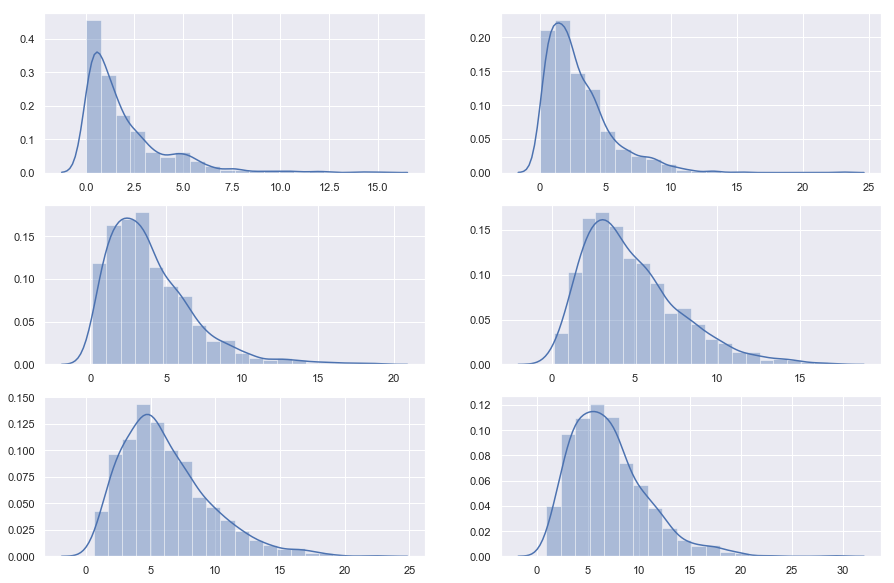

In [37]:
plt.figure(figsize = [15,10])

plt.subplot(3,2,1)
s = np.random.chisquare(2,1000)
sns.distplot(s, bins =20)

plt.subplot(3,2,2)
s = np.random.chisquare(3,1000)
sns.distplot(s, bins =20)

plt.subplot(3,2,3)
s = np.random.chisquare(4,1000)
sns.distplot(s, bins =20)

plt.subplot(3,2,4)
s = np.random.chisquare(5,1000)
sns.distplot(s, bins =20)

plt.subplot(3,2,5)
s = np.random.chisquare(6,1000)
sns.distplot(s, bins =20)

plt.subplot(3,2,6)
s = np.random.chisquare(7,1000)
sns.distplot(s, bins =20)

plt.show()

### 5. The Poisson distribution

$f(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k!}$

For events with an expected separation $\lambda$ the Poisson distribution $f(k; \lambda)$ describes the probability of k events occurring within the observed interval $\lambda$.

In [38]:
s = np.random.poisson(5, 10000)
s[0:10]

array([4, 3, 7, 6, 2, 4, 7, 4, 8, 3])

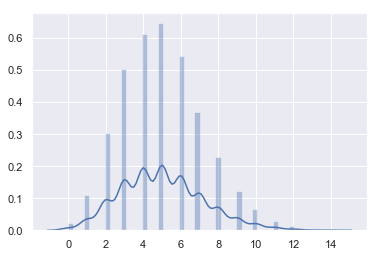

In [21]:
sns.distplot(s)

### 6. Multivariate Gaussian Distribution (Gaussian Mixture)

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/c66e6f6abd66698181e114a4b00da97446efd3c4)


![img](https://www.sharetechnote.com/image/EngMath_CovarianceMatrix_02.png)|  ![img](https://www.sharetechnote.com/image/EngMath_CovarianceMatrix_07.png)

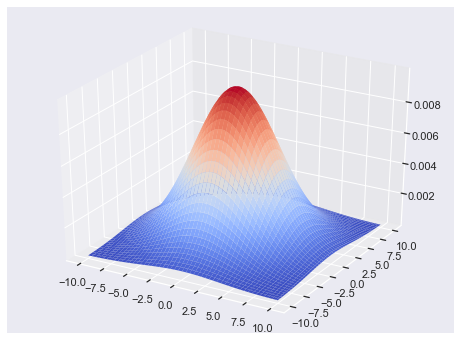

In [24]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = [8,6])
ax = fig.gca(projection='3d')

size = 100
sigma_x = 4.
sigma_y = 4.

x = np.linspace(-10, 10, size)
y = np.linspace(-10, 10, size)

xg, yg = np.meshgrid(x, y)

zg = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(xg**2/(2*sigma_x**2)
     + yg**2/(2*sigma_y**2))))


# Plot the surface.
surf = ax.plot_surface(xg,yg,zg,\
                       cmap=cm.coolwarm,\
                       linewidth=0)


plt.show()

- 2D Gaussian Random numbers

In [115]:
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
x, y = np.random.multivariate_normal(mean, cov, 5000).T

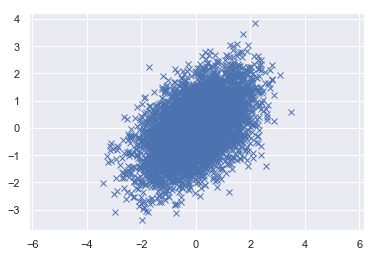

In [118]:
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

- 3D - Gaussian random numbers

In [120]:
mean = [0, 0, 0]
cov = [[1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]]
x, y, z = np.random.multivariate_normal(mean, cov, 5000).T

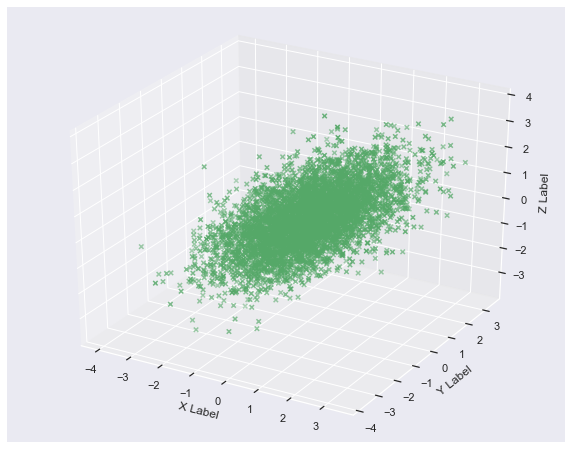

In [124]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='g', marker='x')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

------------

### Connection to Machine Learning (Optional)

#### 1. [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

Let $(x1, x2, …, xn)$ be a univariate independent and identically distributed sample drawn from some distribution with an unknown density ƒ. We are interested in estimating the shape of this function ƒ. Its kernel density estimator is

$ {f}_{h}(x)={\frac {1}{n}}\sum _{i=1}^{n}K_{h}(x-x_{i})={\frac {1}{nh}}\sum _{i=1}^{n}K{\Big (}{\frac {x-x_{i}}{h}}{\Big )}$

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Comparison_of_1D_histogram_and_KDE.png/500px-Comparison_of_1D_histogram_and_KDE.png)

where K is the kernel — a non-negative function — and h > 0 is a smoothing parameter called the bandwidth.

- Data generater

In [39]:
def generate_data(seed=17):
    # Fix the seed to reproduce the results
    rand = np.random.RandomState(seed)
    x = []
    dat = rand.lognormal(0, 0.3, 1000)
    x = np.concatenate((x, dat))
    dat = rand.normal(3, 1, 1000)
    x = np.concatenate((x, dat))
    return x

- Data exploration

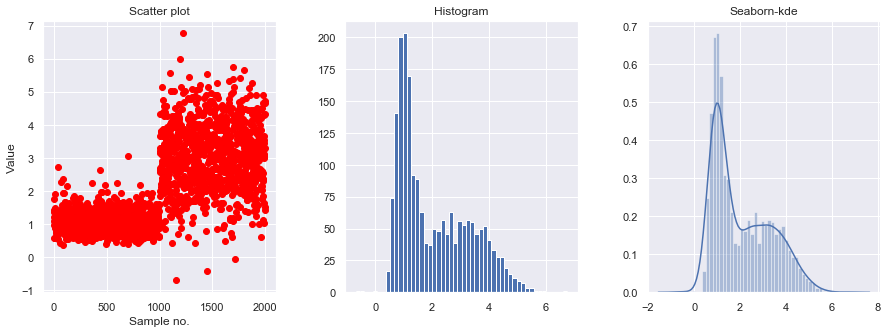

In [46]:
x_train = generate_data()[:, np.newaxis]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

plt.subplot(131)
plt.scatter(np.arange(len(x_train)), x_train, c='red')
plt.xlabel('Sample no.')
plt.ylabel('Value')
plt.title('Scatter plot')

plt.subplot(132)
plt.hist(x_train, bins=50)
plt.title('Histogram')
fig.subplots_adjust(wspace=.3)


plt.subplot(133)
sns.distplot(x_train, bins=50)
plt.title('Seaborn-kde')
fig.subplots_adjust(wspace=.3)
plt.show()

- Implement KDE with test data

In [48]:
from sklearn.neighbors import KernelDensity

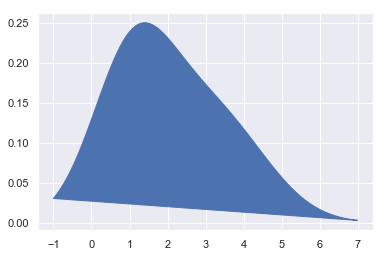

In [50]:
x_test = np.linspace(-1, 7, 2000)[:, np.newaxis]

model = KernelDensity()
model.fit(x_train)
log_dens = model.score_samples(x_test)

plt.fill(x_test, np.exp(log_dens), c='b')
pass

- Setting bandwidth in Kerneldensity

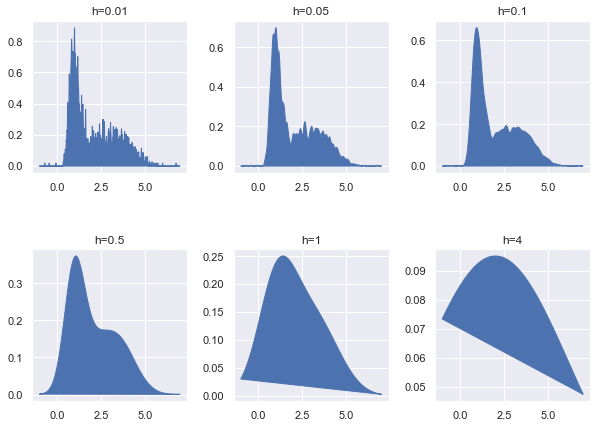

In [50]:
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(x_train)
    score = kde_model.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(score), c='b')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

#### Mini Assignment:
- Generate two (1-d) random normal distribution samples with two means seperated by 1 unit.
- Find the representative distribution by implementation of kernelmdesity estimation. 

### 2.  Gaussian Mixture Model (Optional)

In [51]:
from matplotlib.colors import LogNorm
from sklearn import mixture

In [52]:
n_samples = 1000

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0.5, -0.7], [3.5, 1.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

In [53]:
# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

In [54]:
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [55]:
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

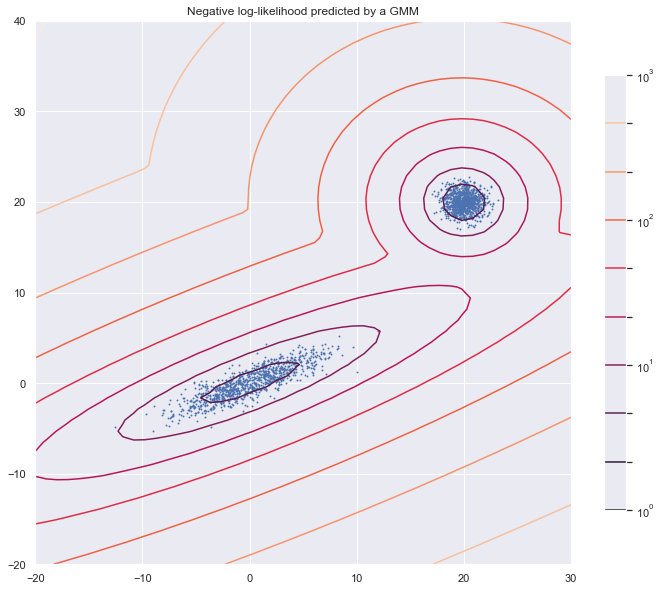

In [21]:
plt.figure(figsize = [12,10])
# display predicted scores by the model as a contour plot

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))

CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()